In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [10]:
df= pd.read_csv(r"c:\Users\DELL\Desktop/bmi (1).csv")
print(df)

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


In [11]:
df.head(10)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [12]:
df.tail(10)

,Gender,Height,Weight,Index
490,Female,164,59,2
491,Female,146,147,5
492,Female,198,50,0
493,Female,170,53,1
494,Male,152,98,5
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [13]:
# shape of the dataframe
df.shape

(500, 4)

In [14]:
# data types of each column
df.dtypes

Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object

In [15]:
# number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [16]:
# number of unique values of column gender
df.Gender.nunique()

2

In [17]:
# unique values of column gender
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [18]:
df.size

2000

In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


Text(0, 0.5, 'Frequency')

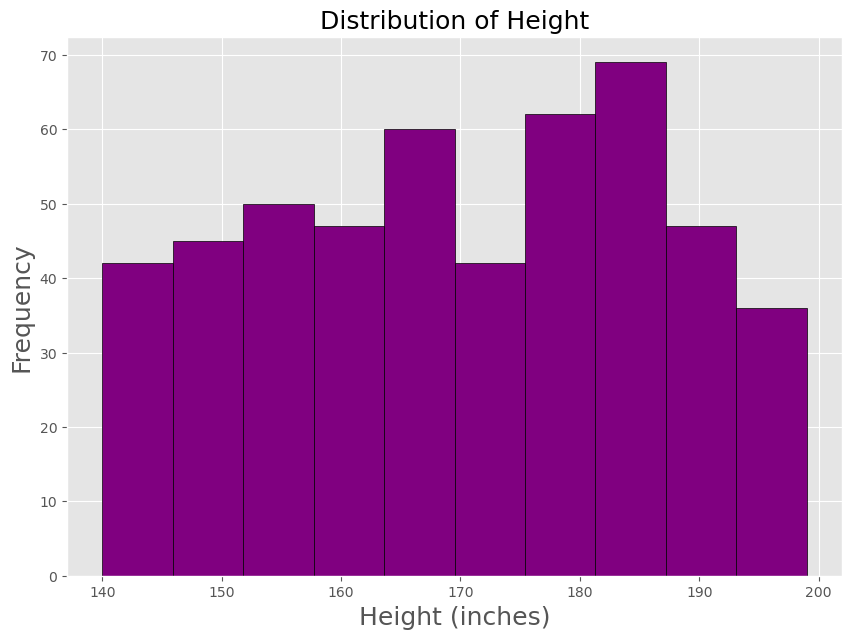

In [20]:
# histogram of the height
df.Height.plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Height',size=18)
plt.xlabel('Height (inches)',size=18)
plt.ylabel('Frequency',size=18)


Text(0, 0.5, 'Frequency')

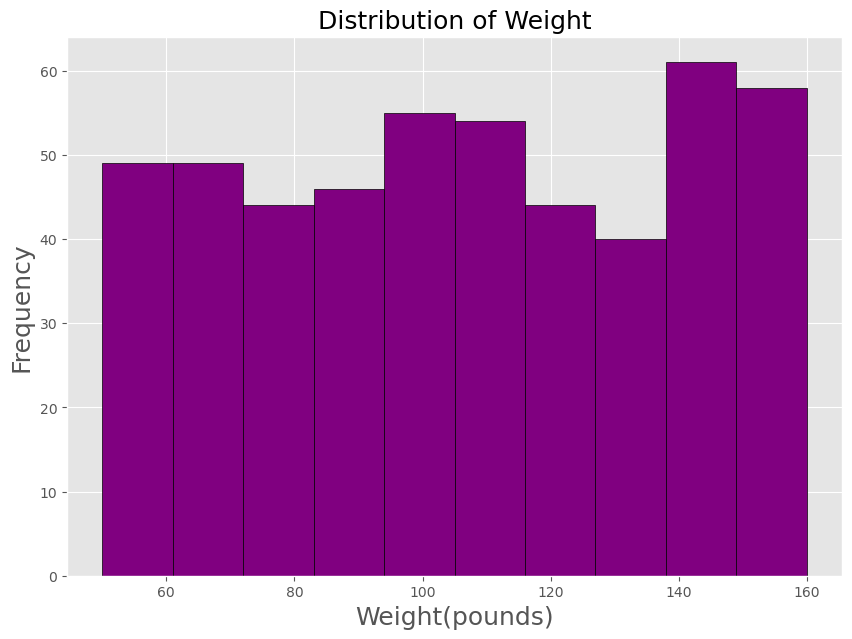

In [21]:
# histogram of the weight
df.Weight.plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Weight',size=18)
plt.xlabel('Weight(pounds)',size=18)
plt.ylabel('Frequency',size=18)

Text(0, 0.5, 'Frequency')

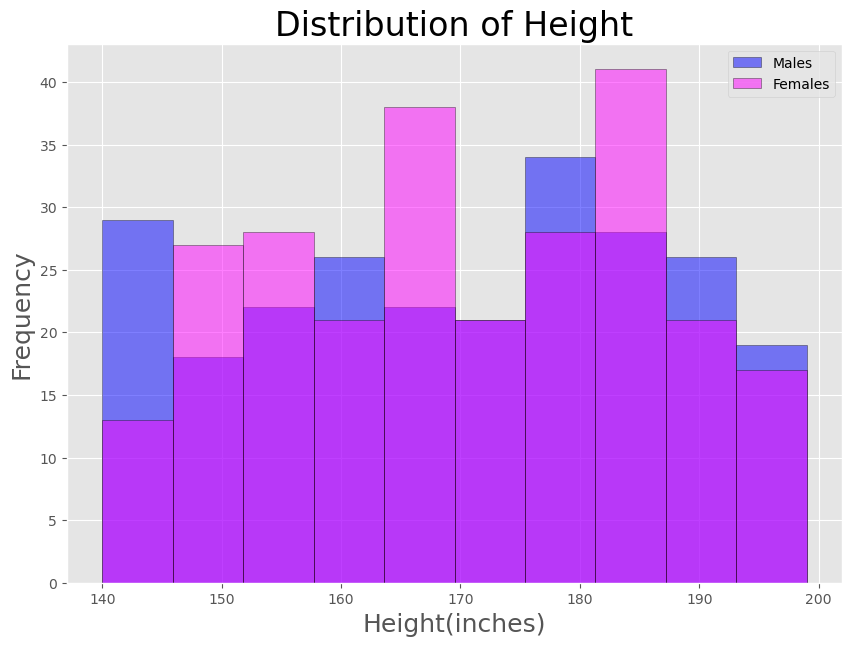

In [22]:
# histogram of the height -males and females
df[df['Gender']=='Male'].Height.plot(kind='hist',color='blue',edgecolor='black',alpha =0.5,figsize=(10,7))
df[df['Gender']=='Female'].Height.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))

plt.legend(labels=['Males','Females'])
plt.title('Distribution of Height',size=24)
plt.xlabel('Height(inches)',size=18)
plt.ylabel('Frequency',size=18)

Text(0, 0.5, 'Frquency')

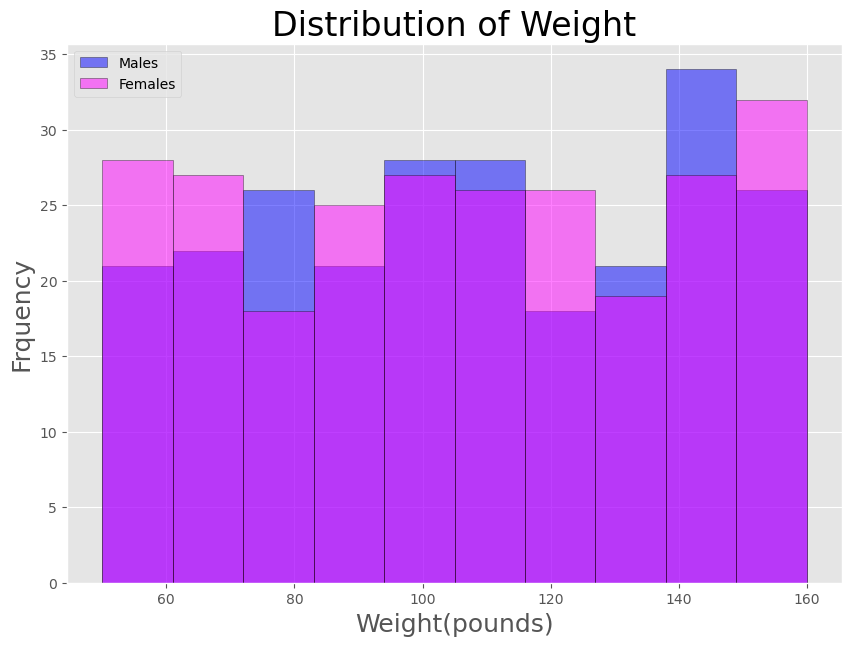

In [23]:
# histogram of the wight -males and females

df[df['Gender']=='Male'].Weight.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
df[df['Gender']=='Female'].Weight.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Weight',size=24)
plt.xlabel('Weight(pounds)',size=18)
plt.ylabel('Frquency',size=18)

Text(0, 0.5, 'Frequency')

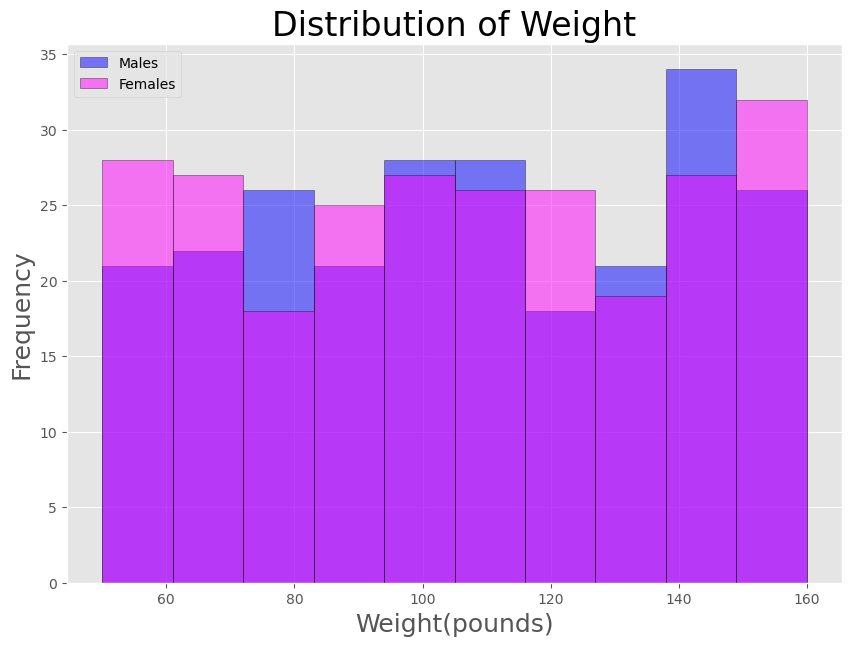

In [24]:
df[df['Gender']=='Male'].Weight.plot(kind='hist',color='blue',edgecolor='black',alpha =0.5,figsize=(10,7))
df[df['Gender']=='Female'].Weight.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))

plt.legend(labels=['Males','Females'])
plt.title('Distribution of Weight',size=24)
plt.xlabel('Weight(pounds)',size=18)
plt.ylabel('Frequency',size=18)

In [25]:
# Descriptive statistics male
statistics_male=df[df['Gender']=='Male'].describe()
statistics_male.rename(columns=lambda x: x + '_male',inplace=True)

statistics_female=df[df['Gender']=='Female'].describe()
statistics_female.rename(columns=lambda x: x + '_female',inplace=True )

# data frame  that contains statistics  for both male and female
statistics=pd.concat([statistics_male,statistics_female],axis=1)
statistics


,Height_male,Weight_male,Index_male,Height_female,Weight_female,Index_female
count,245.000000,245.000000,245.000000,255.000000,255.000000,255.000000
mean,169.648980,106.314286,3.787755,170.227451,105.698039,3.709804
std,17.065665,31.832734,1.386355,15.711825,32.962025,1.325886
min,140.000000,50.000000,0.000000,140.000000,50.000000,0.000000
25%,154.000000,80.000000,3.000000,157.000000,79.000000,3.000000
50%,171.000000,105.000000,4.000000,170.000000,106.000000,4.000000
75%,183.000000,137.000000,5.000000,184.000000,135.000000,5.000000
max,199.000000,160.000000,5.000000,199.000000,160.000000,5.000000


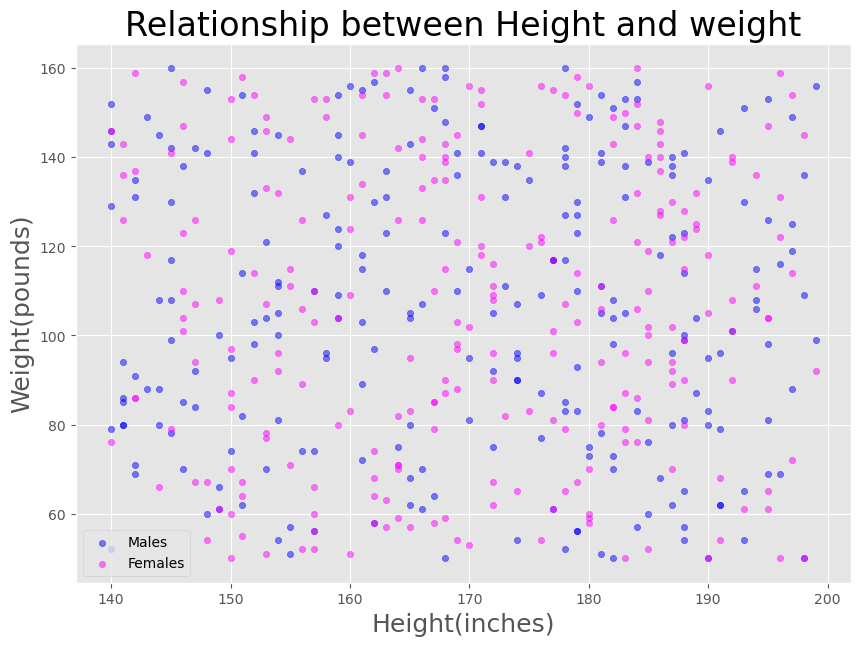

In [26]:
# scatter plot of Height and Weight
ax1=df[df['Gender']=='Male'].plot(kind='scatter',x='Height',y='Weight',color='blue',alpha=0.5,figsize=(10,7))
df[df['Gender']=='Female'].plot(kind='scatter',x='Height',y='Weight',color='magenta',alpha=0.5,figsize=(10,7),ax=ax1)
plt.legend(labels=['Males','Females'])
plt.title('Relationship between Height and weight',size=24)
plt.xlabel('Height(inches)',size=18)
plt.ylabel('Weight(pounds)',size=18);

In [40]:
# scatter plot of 500 females
sample_females=df[df['Gender']=='Females'].sample(50)
sample_females.plot(kind='Scatter',x='Height',y='Weight',color='magenta',alph=0.5,figsize=(10,7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight(sample of 100 females)',size=20)
plt.xlabel('Height(inches)',size=18)
plt.ylabel('Weight(pounds)',size=18);

ValueError: a must be greater than 0 unless no samples are taken

In [39]:
import numpy as np
# best fit polynomials
df_males=df[df['Gender']=='Male']
df_females=df[df['Gender']=='Female']

#polynomial -males
male_fit=np.polyfit(df_males.Height,df_males.Weight,1)

# polynomial-females
female_fit=np.polyfit(df_females.Height,df_females.Weight,1)

NameError: name 'male_fit' is not defined

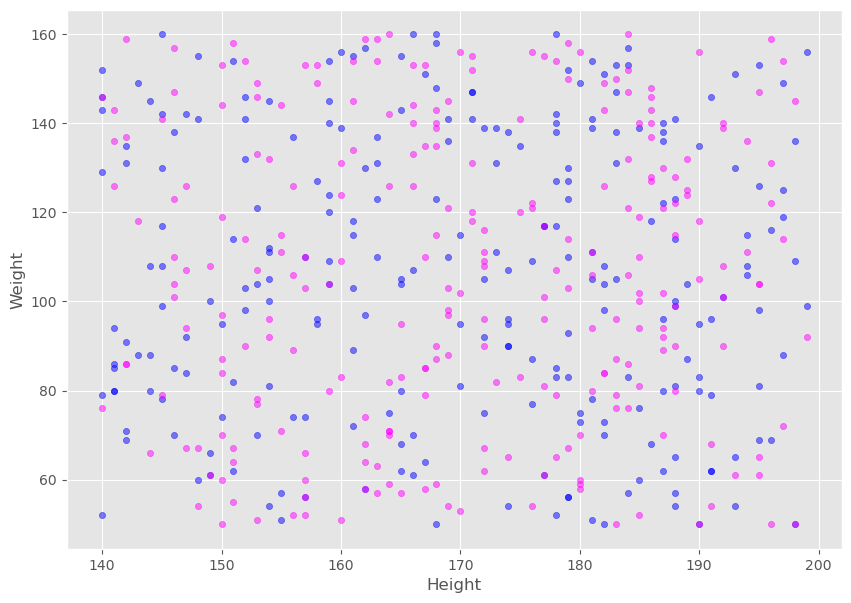

In [37]:
# scatter plots and regression lines
# males and females dataframes
df_males=df[df['Gender']=='Male']
df_females=df[df['Gender']=='Female']

# scatter plots.

ax1=df_males.plot(kind='scatter',x='Height',y='Weight',color='blue',alpha=0.5,figsize=(10,7))
df_females.plot(kind='scatter',x='Height',y='Weight',color='magenta',alpha=0.5,figsize=(10,7),ax=ax1)

# regression lines
plt.plot(df_males.Height,male_fit[0]*df_males.Height+male_fit[1],color='darkblue',linewidth=2)

plt.plot(df_females.Height,female_fit[0]*df_females.Height+female_fit[1],color='deeppink',linewidth=2)

# regression equations
plt.text(65,230,'y={:.2f}+{:.2f}*x'.format(male_fit[1],male_fit[0]),color='darkblue',size=12)
plt.text(70,130,'y={:.2f}+{:.2f}*x'.format(female_fit[1],female_fit[0]),color='deeppink',size=12)

# legend title and labels.
plt.legend(labels=['Males Regression Line','Females Regression Line','Males','Females'])
plt.title('Relationship between Height and Weight',size=24)
plt.xlabel('Height(inches)',size=18)
plt.ylabel('Weight(pounds)',size=18);

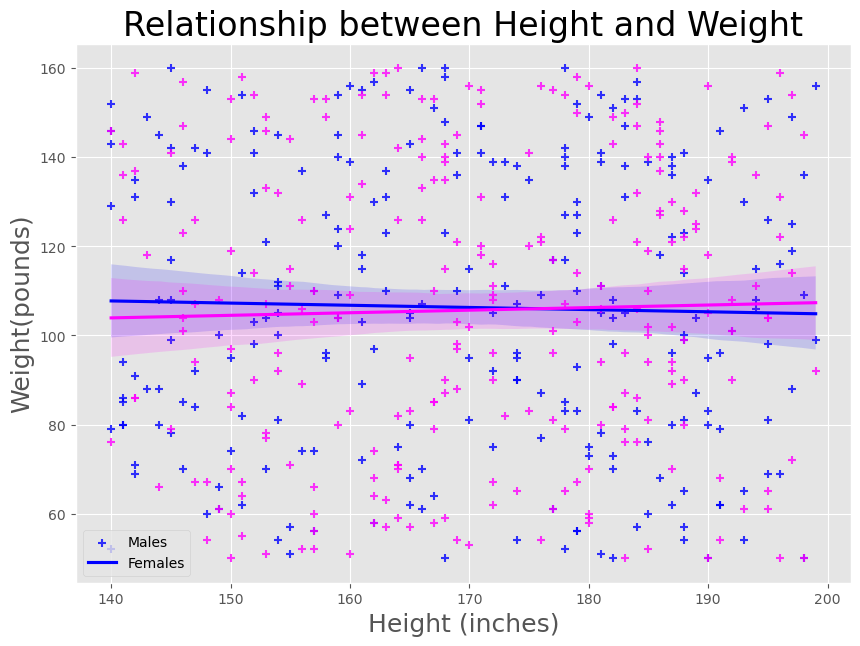

In [29]:
import seaborn as sns
# regression plot using seaborn
fig=plt.figure(figsize=(10,7))
sns.regplot(x=df_males.Height,y=df_males.Weight,color='blue',marker='+')
sns.regplot(x=df_females.Height,y=df_females.Weight,color='magenta',marker='+')

# legend ,title and labels
plt.legend(labels=['Males','Females'])
plt.title('Relationship between Height and Weight',size=24)
plt.xlabel('Height (inches)',size=18)
plt.ylabel('Weight(pounds)',size=18);

In [30]:
# pearson correlation coefficient
# correlation measures the extent to which two variable are related.The pearson correlation coefficient is used to measure the
#strength and direction of the linear relationship between two variables.
# +1 and -1 where 1 is perfect positive linear correlation ,0 is no linear correlation and -1 is perfect negative linear correlation
# and 0 is no linear correlation and -1 is perfect negative linear correlation.

import numpay as np

ModuleNotFoundError: No module named 'numpay'

In [41]:
# dataframe containing only females
df_females=df[df['Gender']=='Female']

# correlation coefficients
df_females.corr()

ValueError: could not convert string to float: 'Female'

In [8]:
# data frame containing only males
df_males=df[df['Gender']=='Male']

# correlation coeffiecients

df_males.corr()

ValueError: could not convert string to float: 'Male'

In [35]:
import seaborn as sns

In [34]:
# dataframe containing only females
df_females=df[df['Gender']=='Female'].sample(50)

# residual plot 100 females
fig=plt.figure(figsize=(5,3))
sns.residplot(df_females.Height, df_females.Weight, color='magenta')

# title and labels
plt.title('Residual plot 50 females',size=24)
plt.xlabel('Height(inches)',size=18)
plt.ylabel('Weight (pounds)',size=18);

TypeError: residplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 500x300 with 0 Axes>

In [45]:
# categorical variable in multiple linear regression
# there are two types of variables used in statistics: numerical and categorical variables.
# numerical variables:- represent values that can be measured and sorted in ascending and descending order such as the height of 
# ascending and descending order such as  the height of a person.
# categorical variables:- ae values that can be sorted in groups or categories such as the gender of a person.

# key takeaways #


In [ ]:
# 1.simple linear regression is a linear approach to model the relationship between
# a dependent variable and one independent variable.


# Multiple linear regression uses a linear function to predict the values of a dependent variable containing the function in
# n independent variables.

# Exploratiory data analysis consists of analyzing the main characteristics of a data set usually by means
# of visualization methods and summary statistics.

# Histograms are plots that show the distribution of a numeric variable,grouping data into bins.
#pandas provide methods and functions for exploratory data analysis such as ,Dataframe.describe(),Dataframe.info(),Dataframe.
#datatypes and Dataframe.shape.

# scatter plots are two dimensional data visualization that show the relationship between two numerical variable one plotted
# along  the x-axis and the other plotted along the y-axis.Matplotlib and seaborn provide built in functions
# to  plot scatter plots.

#  we can fit a simple linear regression model  using libraries such as numpy or scikit-learn.
# correlation measures the extent to which two variables are related.The pearson coreelation coefficient is used to measure
# the strength and direction of the  linear  relationship between two variables.

# residual plots can be used to andalyse whether or not a linear regression model
# is appropriate for the data.

# categorical variable have to converted into dummy variables to use them in multiple linear regression models.



